In [1]:
import pandas as pd
import numpy as np
import sys
from PIL import Image
import matplotlib.pyplot as plt

# progressInstalled = False
# try:
#     from progress.bar import ChargingBar
# except:
#     progressInstalled = False

sets = set(['a','b','c','d','e'])

def loadData(src,datasets= ['a','b','c','d','e'] , size=180, mode='RGB', rng=0):
    m = {'RGB': 3, 'L': 1, '1': 1}
    inputs = []
    outputs = []
    datasets = [i for i in datasets if i in sets]
    if datasets == []:
        datasets = ['a','b','c','d','e']
    for dataset in datasets:
        labels = pd.read_csv(src + "/training-{0}.csv".format(dataset))
        if rng == 0:
            labels = labels[['filename', 'digit']]
        else:
            labels = labels[['filename', 'digit']][rng[0]:rng[1]]
        Y = np.array(labels['digit'],dtype=np.uint8)
        length = len(labels)
        X = np.zeros((length, size, size, m[mode]))
        num = 0
        # if progressInstalled:
        #     bar = ChargingBar('Loading Training Set {0}'.format(dataset),max = len(labels),
        #                       suffix='%(index)d/%(max)d - %(percent).1f%% - %(eta)ds')
        for i in labels['filename']:
            img = Image.open(src + "/training-{0}/".format(dataset) + i)
            c = img.resize((size, size))
            c = np.array(c.convert(mode), dtype=np.uint8).reshape((size,size,m[mode]))
            X[num, :, :, :] = c
            num = num + 1
            # if progressInstalled and (not num % max(1,(length / 200))):
            #     bar.index = num
            #     bar.update()
            # else:
            #     if (not num % (length / 20)):
            #         print("Loaded Training Set {0}:. ".format(dataset) + str(num) + "/" + str(length))
            if (not num % (length / 20)):
                print("Loaded Training Set {0}:. ".format(dataset) + str(num) + "/" + str(length))
        # if progressInstalled:
        #     bar.finish()
        inputs.append(X)
        outputs.append(Y)

    X = np.concatenate(inputs,axis = 0)
    Y = np.concatenate(outputs,axis = 0)
    return (X, Y)


def show_digit(x,label):
    plt.axis('off')
    l = x.shape[1]
    m = x.shape[2]
    if m == 1:
        plt.imshow(x.reshape((l,l)), cmap=plt.cm.gray)
    else:
        plt.imshow(x.reshape((l, l, m)))
    #plt.title(label)
    plt.show()
    return


def vis_image(index, X, Y):
    label = Y[index]
    show_digit(X[index, :, :, :],label)
    print("Label " + str(label))
    return

In [2]:
X,Y = loadData("../input/numta",size = 28, mode = 'L',rng = (0,5500))

Loaded Training Set a:. 275/5500
Loaded Training Set a:. 550/5500
Loaded Training Set a:. 825/5500
Loaded Training Set a:. 1100/5500
Loaded Training Set a:. 1375/5500
Loaded Training Set a:. 1650/5500
Loaded Training Set a:. 1925/5500
Loaded Training Set a:. 2200/5500
Loaded Training Set a:. 2475/5500
Loaded Training Set a:. 2750/5500
Loaded Training Set a:. 3025/5500
Loaded Training Set a:. 3300/5500
Loaded Training Set a:. 3575/5500
Loaded Training Set a:. 3850/5500
Loaded Training Set a:. 4125/5500
Loaded Training Set a:. 4400/5500
Loaded Training Set a:. 4675/5500
Loaded Training Set a:. 4950/5500
Loaded Training Set a:. 5225/5500
Loaded Training Set a:. 5500/5500
Loaded Training Set c:. 275/5500
Loaded Training Set c:. 550/5500
Loaded Training Set c:. 825/5500
Loaded Training Set c:. 1100/5500
Loaded Training Set c:. 1375/5500
Loaded Training Set c:. 1650/5500
Loaded Training Set c:. 1925/5500
Loaded Training Set c:. 2200/5500
Loaded Training Set c:. 2475/5500
Loaded Training Set 

In [3]:
X.shape

(22359, 28, 28, 1)

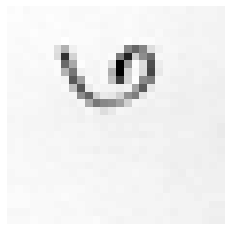

Label 3


In [4]:
vis_image(1,X/255.0,Y)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.1, random_state=42)

In [7]:
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [8]:
X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0

In [9]:
flat_X_train = np.reshape(X_train,newshape=(X_train.shape[0],-1)) 
flat_X_test = np.reshape(X_test,newshape=(X_test.shape[0],-1))
flat_X_val = np.reshape(X_val,newshape=(X_val.shape[0],-1))

In [10]:
kVals = range(1, 30, 2)
accuracies = []

In [11]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(1, 30, 2):
    
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(flat_X_train, y_train)
    # evaluate the model and update the accuracies list
    score = model.score(flat_X_val, y_val)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=74.11%
k=3, accuracy=70.78%
k=5, accuracy=72.17%
k=7, accuracy=71.70%
k=9, accuracy=72.30%
k=11, accuracy=71.38%
k=13, accuracy=70.83%
k=15, accuracy=69.91%
k=17, accuracy=69.99%
k=19, accuracy=69.19%
k=21, accuracy=69.07%
k=23, accuracy=69.02%
k=25, accuracy=68.70%
k=27, accuracy=68.67%
k=29, accuracy=68.87%


In [12]:
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
accuracies[i] * 100))

k=1 achieved highest accuracy of 74.11% on validation data


In [13]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(flat_X_train, y_train)
predictions = knn_model.predict(flat_X_test)

In [14]:
from sklearn import metrics

print("Classification report for classifier %s:\n%s\n"
% (knn_model, metrics.classification_report(y_test, predictions)))

Classification report for classifier KNeighborsClassifier(n_neighbors=1):
              precision    recall  f1-score   support

           0       0.67      0.88      0.76       236
           1       0.63      0.72      0.67       245
           2       0.72      0.76      0.74       193
           3       0.65      0.76      0.70       192
           4       0.81      0.77      0.79       218
           5       0.76      0.61      0.68       243
           6       0.69      0.66      0.67       246
           7       0.85      0.87      0.86       230
           8       0.88      0.85      0.86       223
           9       0.79      0.49      0.60       210

    accuracy                           0.74      2236
   macro avg       0.74      0.74      0.73      2236
weighted avg       0.74      0.74      0.73      2236




In [15]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test, predictions)
print("Confusion matrix:\n%s" % cm)

print("Accuracy={}".format(metrics.accuracy_score(y_test, predictions)))

Confusion matrix:
[[207   9   2   2   2   7   2   3   1   1]
 [ 20 176   9   4   2   2   3   5   3  21]
 [  5  22 147   1   7   5   2   2   2   0]
 [  7   4   1 146   1   4  22   4   2   1]
 [  9   3  11   4 168  11   3   5   3   1]
 [ 29   2   8  11  13 148  28   2   2   0]
 [  3   3   5  51   2   9 162   3   7   1]
 [ 10   3   2   1   3   2   3 200   3   3]
 [  8   4   5   4   5   2   4   2 189   0]
 [ 12  53  13   2   5   4   6   8   4 103]]
Accuracy=0.7361359570661896


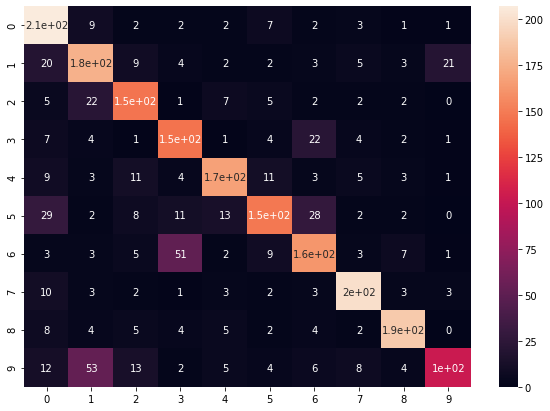

In [16]:
import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(cm.tolist(), index = [i for i in range(10)],
                  columns = [i for i in range(10)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

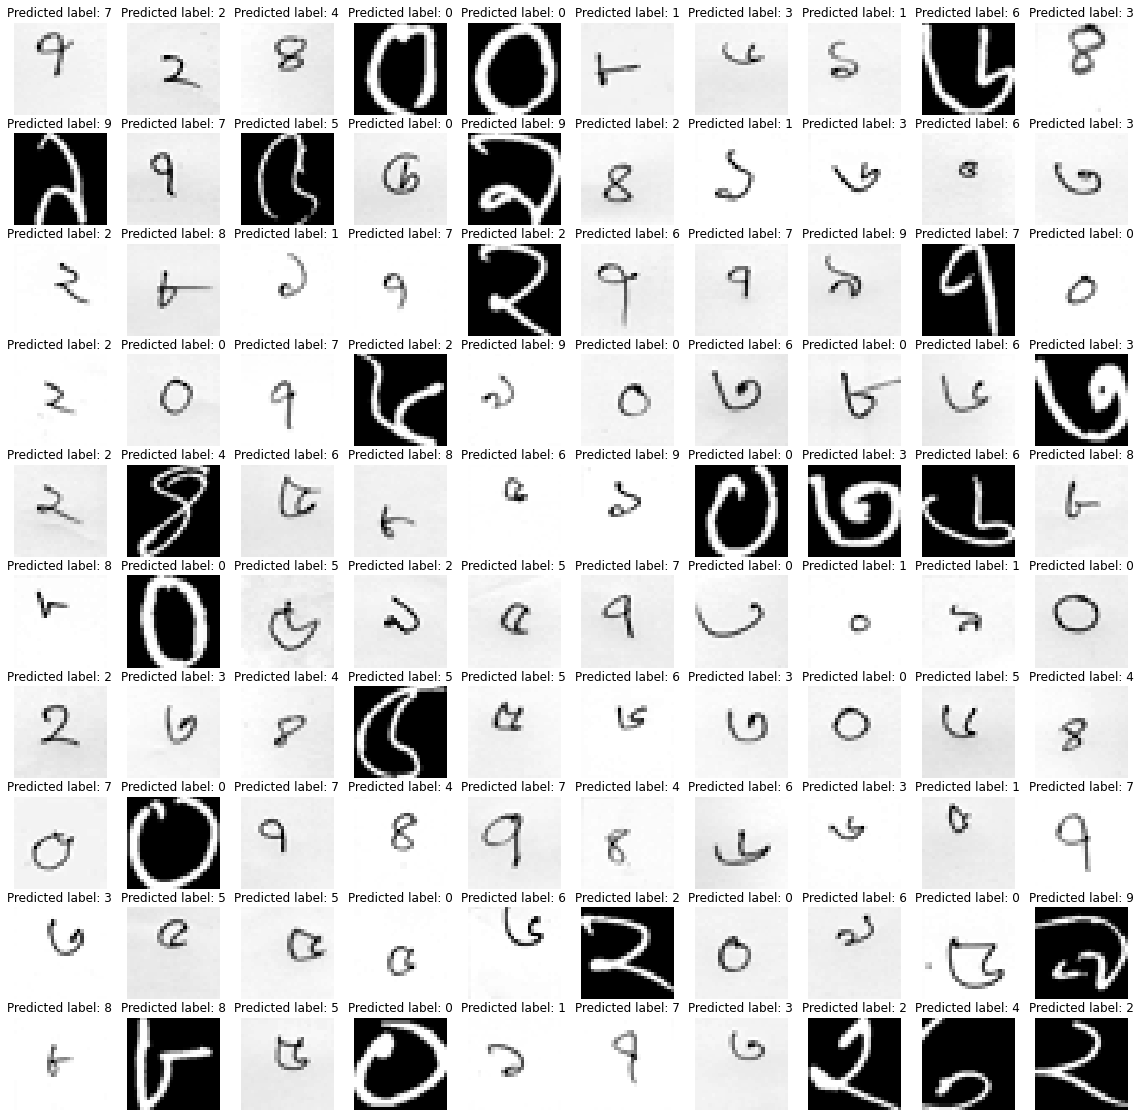

In [17]:
image_per_row = 10
image_per_col = 10
N = image_per_row * image_per_col
random_index = np.random.randint(0, X_test.shape[0], (N))
fig = plt.figure(figsize=(2 * image_per_col, 2 * image_per_row))
for i in range(N):
    idx = random_index[i]
    plt.subplot(image_per_row, image_per_col, i + 1)
    plt.axis('off')
    plt.imshow(flat_X_test[idx].reshape(28,28), cmap='gray')
    plt.title('Predicted label: ' + str(predictions[idx]))
plt.show()